In [33]:
# 역전파 알고리즘 
# 백프로 웅냥냥 알고리즘 
# 오늘은 cnn을 배워요. 신경망에서의 하이퍼파라미터도 배워요


In [34]:
from tensorflow import keras

(train_input, train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()
from sklearn.model_selection import train_test_split

train_scaled = train_input/255.0
train_scaled = train_scaled

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)


In [35]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs= 5 )

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5299 - accuracy: 0.8163
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3992 - accuracy: 0.8567
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3548 - accuracy: 0.8702
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3295 - accuracy: 0.8800
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3083 - accuracy: 0.8868


In [36]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3603 - accuracy: 0.8702


[0.3603082597255707, 0.8702499866485596]

In [37]:
# 신경망 모델 훈련

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2935 - accuracy: 0.8915
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2800 - accuracy: 0.8958
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2692 - accuracy: 0.9007
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2602 - accuracy: 0.9025
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2502 - accuracy: 0.9074


In [38]:
def model_fn(a_layer = None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape = (28,28)))
  model.add(keras.layers.Dense(100, activation = 'relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [39]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=5, verbose = 0)  #verbose는 학습 과정 출력 생략

In [40]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


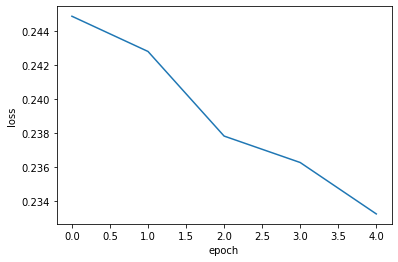

In [41]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('7_3-01', dpi = 300)
plt.show()

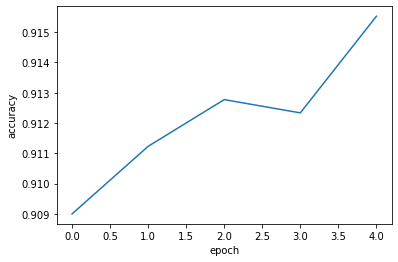

In [42]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.savefig('7_3-01', dpi = 300)
plt.show()

In [45]:
#검증손실 계산
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [46]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


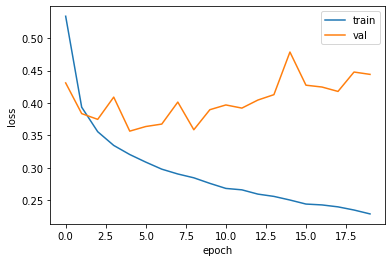

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-04', dpi = 300)
plt.show()

#과대적합으로 가는 중

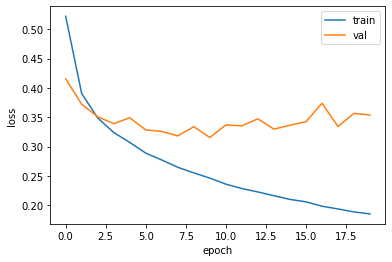

In [51]:
# 옵티마이저 변경 RMSProp (dafault) -> Adam
model = model_fn()
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose = 0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-04', dpi = 300)
plt.show()


In [53]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


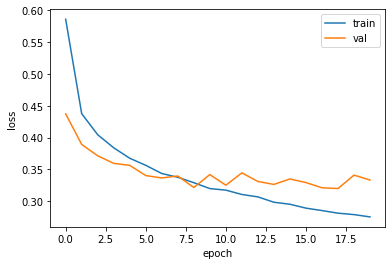

In [55]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose = 0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-04', dpi = 300)
plt.show()

#과대적합되는 시점이 확연히 뒤로 밀림

In [60]:
#모델 저장과 복원
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

history = model.fit(train_scaled, train_target, epochs=10, verbose = 0, validation_data = (val_scaled, val_target))

model.save_weights('model-weights.h5')
model.save('model_whole.h5')

!ls -al *.h5

-rw-r--r-- 1 root root 332480 Jul 28 02:27 model-weights.h5
-rw-r--r-- 1 root root 981736 Jul 28 02:27 model_whole.h5


In [61]:
model = model_fn(keras.layers.Dropout(0.3))

model.load_weights('model-weights.h5')

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3447 - accuracy: 0.8735


[0.34469449520111084, 0.8734999895095825]

In [68]:
# 모델 전체를 복원
model = keras.models.load_model('model_whole.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3447 - accuracy: 0.8735


[0.34469449520111084, 0.8734999895095825]

In [67]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only = True)

model.fit(train_scaled, train_target, epochs=20, verbose=0,validation_data=(val_scaled, val_target),callbacks=[checkpoint_cb])

In [70]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3209 - accuracy: 0.8832


[0.3209115266799927, 0.8831666707992554]

In [71]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only = True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=1,validation_data=(val_scaled, val_target),callbacks=[checkpoint_cb, early_stopping_cb])

#에포크가 쭊쭊 상승하다가 어느 순간 증가하지 않음 patience를 2로 주면 2번까지는 참기때문에 2번 참고 종료

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5945 - accuracy: 0.7912 - val_loss: 0.4261 - val_accuracy: 0.8481
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4385 - accuracy: 0.8417 - val_loss: 0.3862 - val_accuracy: 0.8613
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4024 - accuracy: 0.8516 - val_loss: 0.3722 - val_accuracy: 0.8664
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3837 - accuracy: 0.8612 - val_loss: 0.3579 - val_accuracy: 0.8661
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3650 - accuracy: 0.8657 - val_loss: 0.3517 - val_accuracy: 0.8692
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3520 - accuracy: 0.8707 - val_loss: 0.3330 - val_accuracy: 0.8809
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3410 - accuracy: 0.8733 - val_loss: 0.3650 - val_accuracy:

In [72]:
print(early_stopping_cb.stopped_epoch)

#어디서 멈췄닌(0부터 카운트)

7


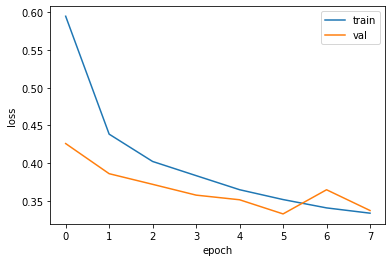

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-04', dpi = 300)
plt.show()

In [74]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.3330 - accuracy: 0.8809


[0.3330244719982147, 0.8809166550636292]

In [75]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3330 - accuracy: 0.8809


[0.3330244719982147, 0.8809166550636292]